In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = './datasets/winequality-red.csv'
df = pd.read_csv(path)

#### Funciones utilizadas 

In [105]:


def rename_reatures(df):
    renamed_columns = {}
    for c in df.columns:
        renamed_columns[c] = c.replace(' ' , '_') 
    print(f'Renaming: {renamed_columns}')
    df = df.rename(columns=renamed_columns)
    return df

def plot_correlation_matrix(df, graphWidth):
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

def print_histograms(df):
    for c in df.columns.values:
        df[c].plot(kind='hist' , title=c)
        plt.show()


def plot_scatter(df , x , y):
    plt.figure(figsize=(7, 5))
    plt.scatter(df[x], df[y] , color='r', marker="x",s=60)
    plt.grid(True, linewidth=0.5)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.show()


#sklean no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):
    return np.mean((yreal-ypred)/yreal)

#### En las siguientes lineas podemos analyzar los tipos de datos del data frame asi como sus parametros de distribucion mediante las funciones:
- dtypes
- info

In [55]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### por un tema de comodidad en el manejo de los datos prefiero renombrar los features eliminando los espacios

In [19]:
df = rename_reatures(df)

Renaming: {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide', 'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality'}


In [21]:
df.columns.values

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

#### En las siguientes lineas podemos apreciar el la distrubucion de los datos mediante la visualizacion de histogramas y el uso de la funcion describe

In [58]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


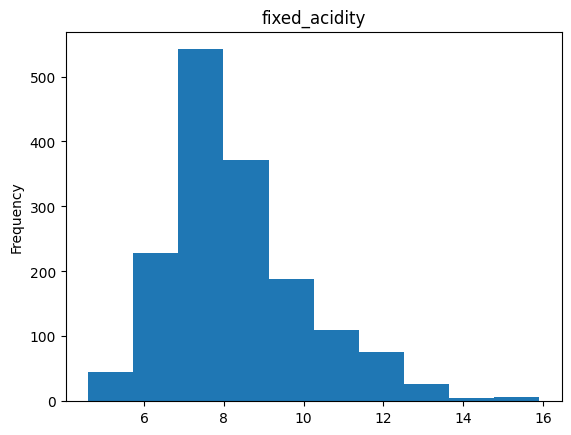

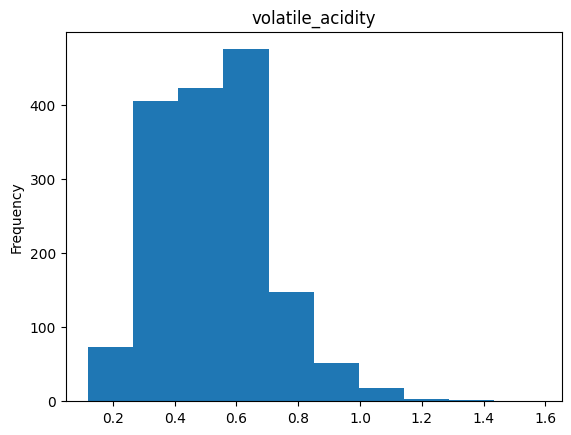

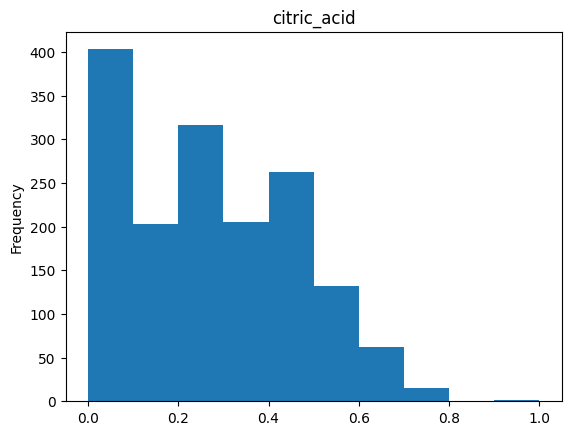

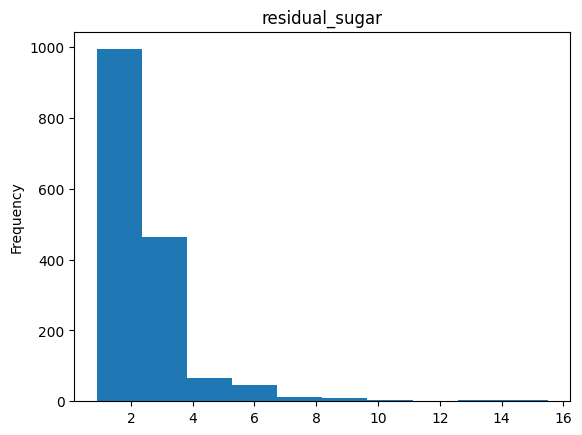

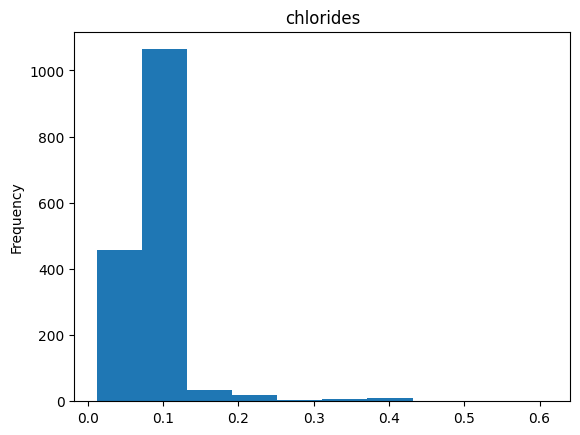

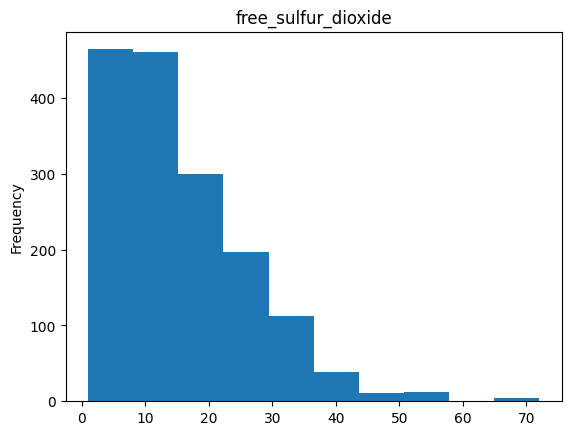

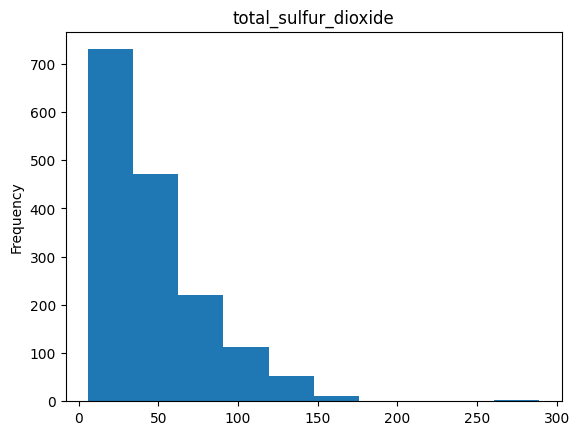

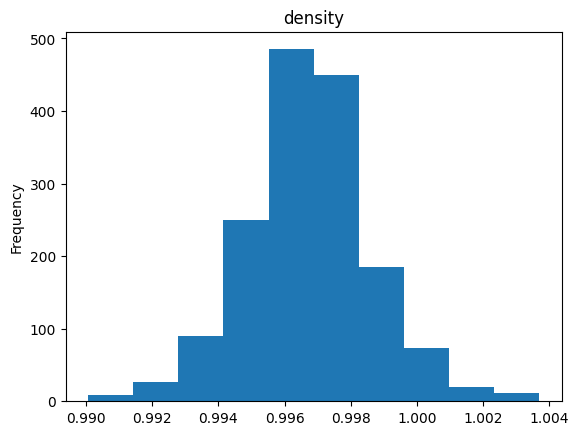

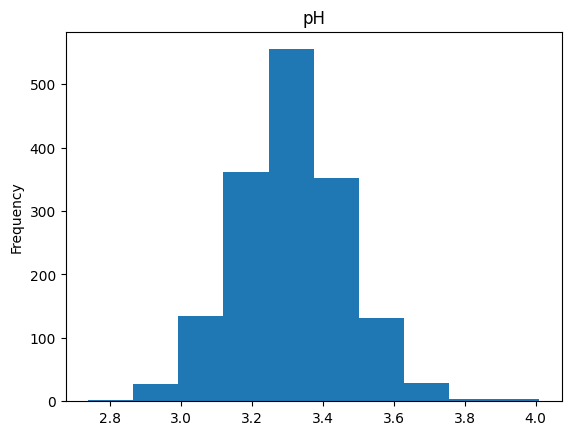

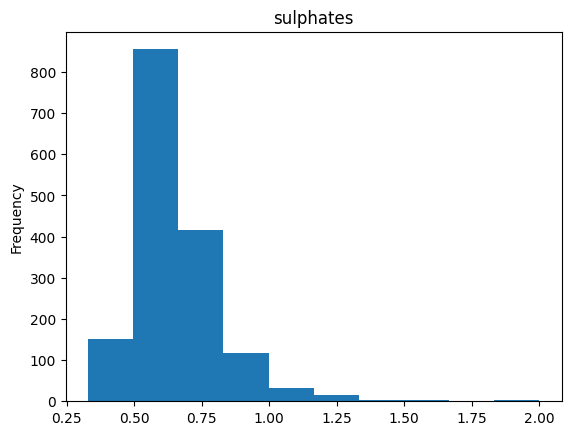

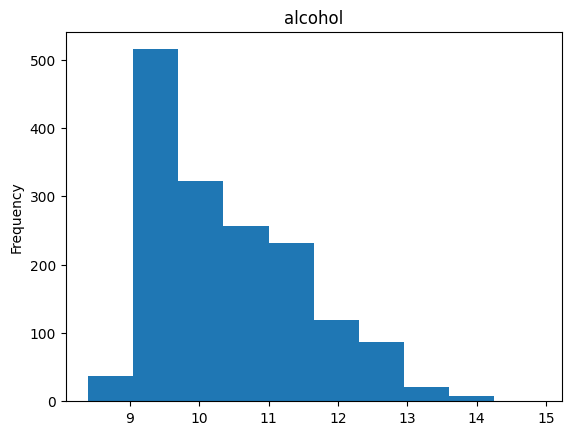

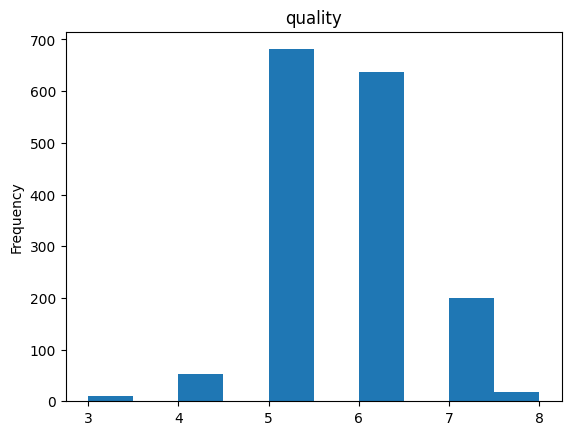

In [51]:
print_histograms(df)

#### En la siguiente matriz de correlacion podemos apreciar el nivel de correlacion entre las variables. Como se puede observar las variables con un mayor nivel de correlacion (entre 0.6 y 0.8) son:
- citric_acid y fixed_acidity
- density y fixed_acidity
- total_sulfur_dioxide y free_sulfur_dioxide

#### Luego, con respecto a la calidad del vino, el nivel de alcohol parece ser la variable con mayor nivel de correlacion,
- alcohol y density (0.476166)

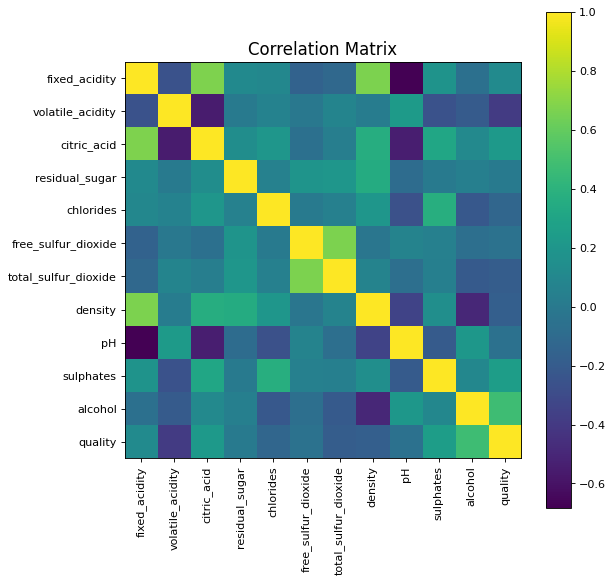

In [36]:
plot_correlation_matrix(df, 8)

In [69]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Graficando la linealidad entre las variables con mayor correlacion

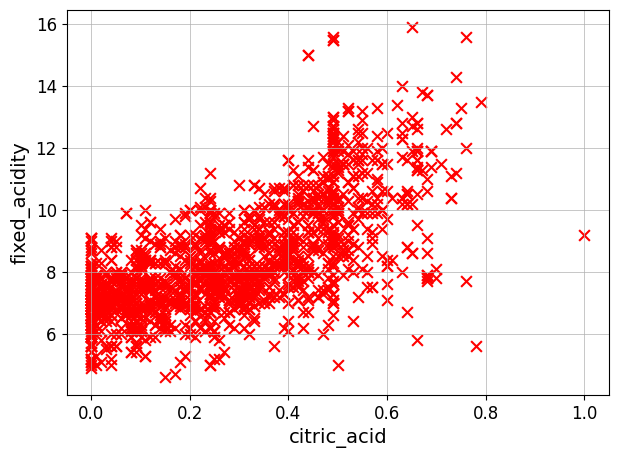

In [66]:
plot_scatter(df, 'citric_acid' , 'fixed_acidity')

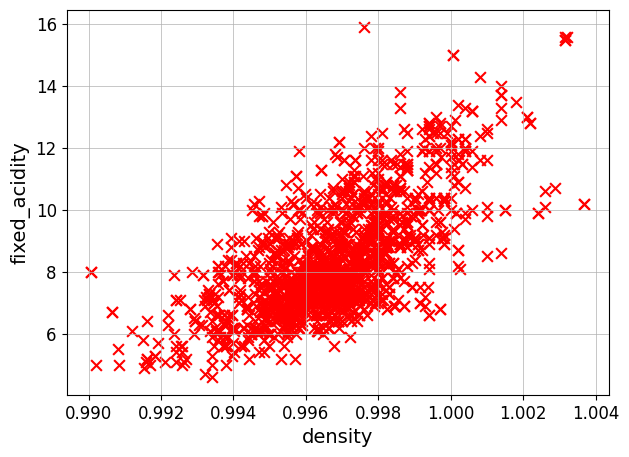

In [67]:
plot_scatter(df, 'density' , 'fixed_acidity')

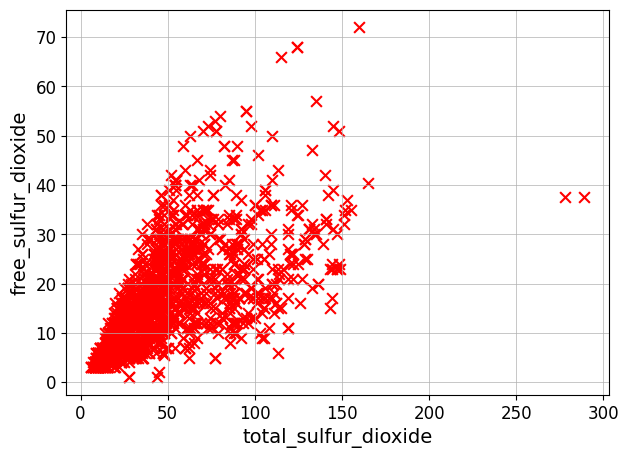

In [68]:
plot_scatter(df, 'total_sulfur_dioxide' , 'free_sulfur_dioxide')

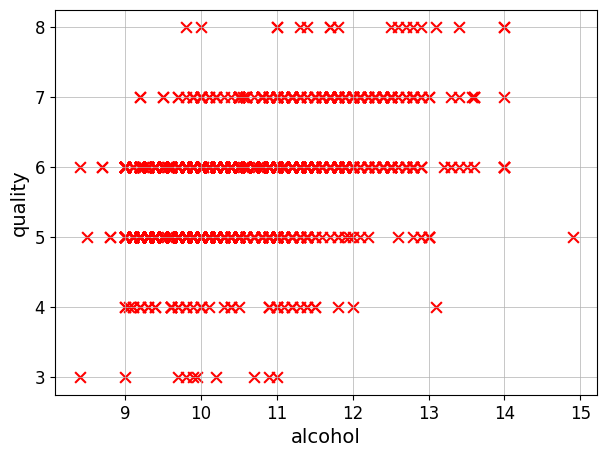

In [70]:
plot_scatter(df, 'alcohol' , 'quality')

#### Todos los features son del tipo numerico con valores no nulos, no parece ser necasario realizar limpieza de datos

In [71]:
len(df)

1599

In [72]:
len(df.dropna())

1599

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [108]:
# Armamos array de Numpy con los features
X = df['alcohol'].values
X = X.reshape([-1, 1])
y = df['quality'].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 1279
Valores de y_train: 1279
Valores de X_test: 320
Valores de y_test: 320


In [92]:
regresion = LinearRegression()

In [94]:
regresion.fit(X_train, y_train)

LinearRegression()

In [95]:

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regresion.coef_ }")
print(f"La ecuación de la recta entonces sera la siguiente: y = {regresion.intercept_ }+({regresion.coef_[0]})X")

El valor de la interseccion de la recta sera 1.6947247353151234
El valor del coeficiente de la recta sera [0.37699262]
La ecuación de la recta entonces sera la siguiente: y = 1.6947247353151234+(0.37699262427574654)X


In [98]:
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size - 2))
print(f"Desvío estándar del modelo {std_dev_model}")

El coeficiente de Pearson es 0.24209702997870952
Desvío estándar del modelo 0.70720152184936


(0.0, 8.25)

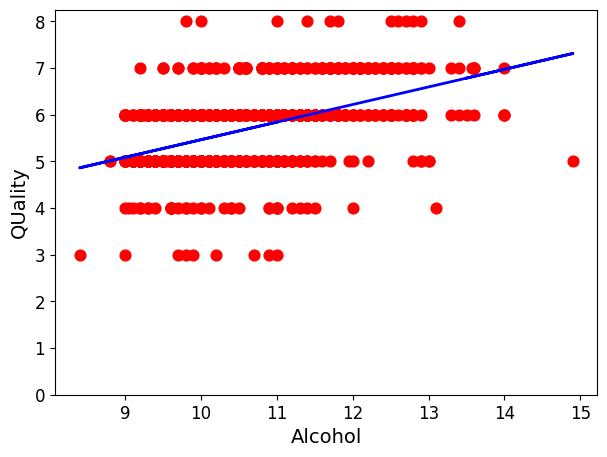

In [100]:

plt.figure(figsize=(7, 5))
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('QUality', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.scatter(X_train, y_train, color='r', marker="o", s=60)
plt.plot(X_train, regresion.predict(X_train), color="b", linewidth=2)

plt.ylim(0)  # Establece el límite inferior del eje y en cero

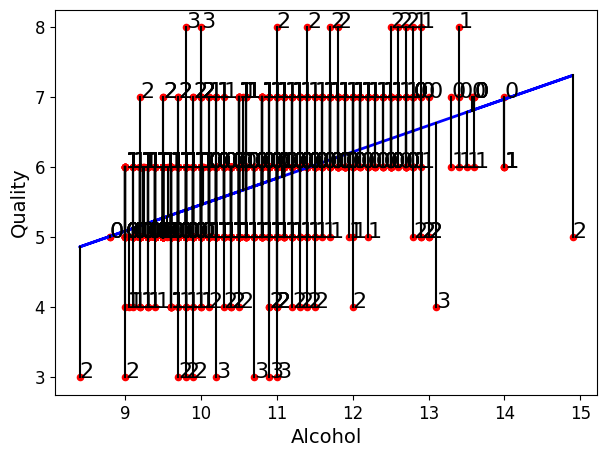

In [102]:
# Convertir X_train en un vector unidimensional
X_train = X_train.flatten()

# Regresión lineal
regression = np.polyfit(X_train, y_train, 1)
regression_line = np.polyval(regression, X_train)

# Calcular las distancias entre los puntos y la línea de regresión
distances = np.abs(regression_line - y_train)

# Graficar los puntos
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='r', s=20)

# Graficar la línea de regresión
plt.plot(X_train, regression_line, color='b', linewidth=2)

# Graficar las líneas perpendiculares desde cada punto a la línea de regresión
for x, y, distance in zip(X_train, y_train, distances):
    plt.plot([x, x], [y, regression[0]*x + regression[1]], color='black', linestyle='-')
    plt.text(x, y, f'{distance:.0f}', ha='left', va="baseline", fontsize=16)

# Configuraciones adicionales

plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Quality', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Mostrar el gráfico
plt.show()

In [103]:
y_pred = regresion.predict(X_test)

In [106]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")

R-cuadrado en test: 0.18535810854277002
Error absoluto medio: 0.57767582774223
Error cuadratico medio: 0.5165020523532149
Raiz de error cuadratico medio: 0.7186807722161592
Error absoluto porcentual medio: 10.39%
Error porcentual medio: -0.89%


#### pendiente elegir el tipo de error